In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm

gold = 8.*np.array([1,1/((1+np.sqrt(5))/2)])

# This function makes the plots look prettier on GitHub. 
### to do: figure out how to make this automatic.

def fix_boxplot(parts):
    for m in parts['fliers']:
        m.set_markersize(12)
        m.set_markeredgewidth(1)
    for b in parts['boxes']:
        b.set_linewidth(2)
    for w in parts['whiskers']:
        w.set_linewidth(2)
    for c in parts['caps']:
        c.set_linewidth(2)
    for m in parts['medians']:
        m.set_linewidth(2)
    for m in parts['means']:
        m.set_linewidth(2)
        m.set_color('g')
        m.set_markerfacecolor('g')

# Problem 3.1

Rather than use the text's data table for this problem, I will use one of my own making to avoid the potential for others to reproduce my work as their own in a homework solution.

In [2]:
data = np.random.randint(1,50,size=25)
data

array([ 2, 20, 10, 48, 30, 40, 49,  5,  1, 28,  1,  3, 33, 36, 29, 15, 44,
       48, 34, 34, 11, 42,  5, 29,  2])

### Part A
We want to create a stem-and-leaf diagram for this data.

To the best of my knowledge at this time, none of the statistics packages will do this automatically. Fortunately, it is a trivial thing to code.

In [3]:
def stem(data,leaf_dig=1):
    sorted_data = data.copy()
    sorted_data.sort()
    stem = (sorted_data // (10**leaf_dig)).astype(int)
    if leaf_dig>0:
        leaf = (sorted_data % (10**leaf_dig)).astype(int)
    else:
        leaf = (sorted_data % (10**leaf_dig) * (10**(1-leaf_dig))).astype(int)
    current_stem = -1
    for s,l in zip(stem,leaf):
        if s != current_stem:
            current_stem = s
            print("\n{0:4d} | ".format(s),end='')
        print("{0} ".format(l),end='')

stem(data)




   0 | 1 1 2 2 3 5 5 
   1 | 0 1 5 
   2 | 0 8 9 9 
   3 | 0 3 4 4 6 
   4 | 0 2 4 8 8 9 

### Part B
Next is to find the quartile values of the set.

In [4]:
print("Meidan: {0}".format(np.percentile(data,50)))
print("    Q1: {0}".format(np.percentile(data,25)))
print("    Q3: {0}".format(np.percentile(data,75)))

Meidan: 29.0
    Q1: 5.0
    Q3: 36.0


### Part C

Finally, we create the boxplot of the data.

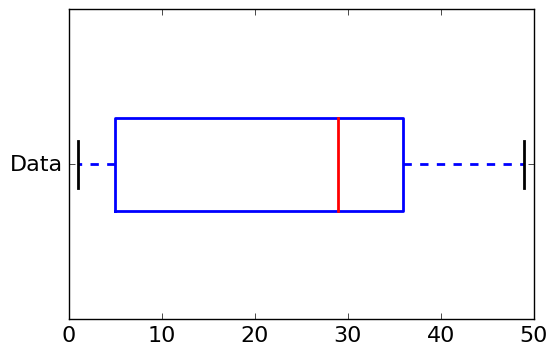

In [5]:
parts = plt.boxplot(data,vert=False,labels=['Data'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis([0,50,0.75,1.25])
fix_boxplot(parts)